In [1]:
import numpy
import urllib
import scipy.optimize
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm # Library for SVM classification
from sklearn import linear_model # Logistic Regression (among other things)
from sklearn.decomposition import PCA # PCA library

### Tasks — Diagnostics (week 2):

In [2]:
f = open("5year.arff", 'r')

In [3]:
# Skip the non-data parts
while not '@data' in f.readline():
    pass

In [4]:
# Read the data
dataset = []
for l in f:
    if '?' in l:
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert from {0,1} to {false,true}
    dataset.append(values)

#### 1. Report the accuracy and Balanced Error Rate (BER) of your classifier.
Answer: <br>
(1) Accurarcy: 0.9663477400197954 <br>
(2) BER: 0.48580623782459387 <br>

In [5]:
# Prepare the data
X = [d[:-1] for d in dataset]
Y = [d[-1] for d in dataset]

In [6]:
model = linear_model.LogisticRegression(C=1.0)
model.fit(X,Y)

C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
pred = model.predict(X)

In [8]:
# Accurarcy
sum(pred == Y) / len(Y)

0.9663477400197954

In [9]:
def getBER(pred, answer):
    TP_ = numpy.logical_and(pred, answer)
    FP_ = numpy.logical_and(pred, numpy.logical_not(answer))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(answer))
    FN_ = numpy.logical_and(numpy.logical_not(pred), answer)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    return (1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP)))

In [10]:
# BER
getBER(pred,Y)

0.48580623782459387

### 3. Shuffle the data, and split it into training, validation, and test splits, with a 50/25/25% ratio.
Using the class weight=’balanced’ option, and training on the training set, report the training/validation/test
accuracy and BER.

Answer: <br>
(1) Accurarcy: <br>
Training set accurarcy: 0.860818 <br>
Validation set accurarcy: 0.840369 <br>
Testing set accurarcy: 0.834875 <br>
(2) BER: <br>
Training set BER: 0.121197 <br>
Validation set BER: 0.158785 <br>
Testing set BER: 0.206173 <br>

In [243]:
random.shuffle(dataset)

In [244]:
numTrain = round(len(dataset) * 0.5)
numValid = round(len(dataset) * 0.25)
numTest = len(dataset) - numTrain - numValid
print("# training: %d" % (numTrain))
print("# validation: %d" % (numValid))
print("# testing: %d" % (numTest))

# training: 1516
# validation: 758
# testing: 757


In [245]:
X = [d[:-1] for d in dataset]
Y = [d[-1] for d in dataset]

In [246]:
XTrain = X[:numTrain]
XValid = X[numTrain:numTrain+numValid]
XTest = X[numTrain+numValid:]

In [247]:
YTrain = Y[:numTrain]
YValid = Y[numTrain:numTrain+numValid]
YTest = Y[numTrain+numValid:]

In [248]:
model = linear_model.LogisticRegression(C=1.0, max_iter=1000000, class_weight='balanced')
model.fit(XTrain,YTrain)

C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000000, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [249]:
predTrain = model.predict(XTrain)
predValid = model.predict(XValid)
predTest = model.predict(XTest)

In [250]:
# Accurarcy
print("Training set accurarcy: %f" % (sum(predTrain == YTrain) / len(YTrain)))
print("Validation set accurarcy: %f" % (sum(predValid == YValid) / len(YValid)))
print("Testing set accurarcy: %f" % (sum(predTest == YTest) / len(YTest)))

Training set accurarcy: 0.860818
Validation set accurarcy: 0.840369
Testing set accurarcy: 0.834875


In [251]:
# BERs
print("Training set BER: %f" % (getBER(predTrain,YTrain)))
print("Validation set BER: %f" % (getBER(predValid,YValid)))
print("Testing set BER: %f" % (getBER(predTest,YTest)))

Training set BER: 0.121197
Validation set BER: 0.158785
Testing set BER: 0.206173


### 4. Implement a complete regularization pipeline with the balanced classifier.
Consider values of C in the range {10−4, 10−3, . . . , 103, 104}. Report (or plot) the train, validation, and test BER for each value of C. Based on these values, which classifier would you select (in terms of generalization performance) and why?

Answer: <br>
(1) BERs: <br>
See below images and data <br>
(2) <br>
We would like to pick the classifier (with chosen C) that generalizes the best. One common strategy would be picking one with the best performance on the validation set. The test set only serves for reporting purpose (on how good our strategy on selecting the model, how it performs on unseen data, etc.) so we can't use them when we decide the model (else we can always pick one with the lowest BER directly). Hence, in the below classifiers, we would choose the classifier with the best BER in validation set. The best classifier is the one with C=1000, where it has the lowest BER on validation set. Fortunately, the classifier with C=1000, also provides a competent BER on test set, which can also prove that we select the correct classifier with good strategy.

In [201]:
def getBerByGiven(_C):
    model = linear_model.LogisticRegression(C=_C, max_iter=1000000, class_weight='balanced')
    model.fit(XTrain,YTrain)
    
    predTrain = model.predict(XTrain)
    predValid = model.predict(XValid)
    predTest = model.predict(XTest)
    
    return getBER(predTrain,YTrain), getBER(predValid,YValid), getBER(predTest,YTest)

In [202]:
exps = range(-4,5)
trainBERs = []
validBERs = []
testBERs = []

for exp in exps:
    C = pow(10, exp)
    trainBER, validBER, testBER = getBerByGiven(C)
    trainBERs.append(trainBER)
    validBERs.append(validBER)
    testBERs.append(testBER)

C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

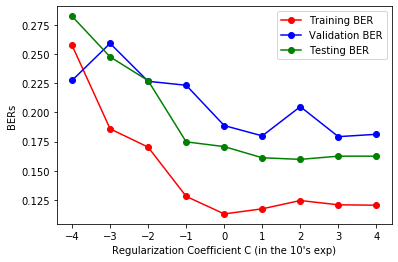

In [203]:
plt.plot(exps, trainBERs, 'o-', color='r', label = 'Training BER')
plt.plot(exps, validBERs, 'o-', color='b', label = 'Validation BER')
plt.plot(exps, testBERs, 'o-', color='g', label = 'Testing BER')

plt.legend()
plt.ylabel('BERs')
plt.xlabel('Regularization Coefficient C (in the 10\'s exp)')
plt.show()

In [204]:
for i in range(len(exps)):
    print("C=%f, training BER:%f, validation BER:%f, testing BER:%f" % (pow(10,exps[i]),trainBERs[i], validBERs[i], testBERs[i]))

C=0.000100, training BER:0.257419, validation BER:0.227371, testing BER:0.282283
C=0.001000, training BER:0.185981, validation BER:0.259079, testing BER:0.247542
C=0.010000, training BER:0.170300, validation BER:0.226626, testing BER:0.227165
C=0.100000, training BER:0.128166, validation BER:0.223238, testing BER:0.174831
C=1.000000, training BER:0.113171, validation BER:0.188753, testing BER:0.170744
C=10.000000, training BER:0.117527, validation BER:0.179946, testing BER:0.161207
C=100.000000, training BER:0.124629, validation BER:0.204946, testing BER:0.159845
C=1000.000000, training BER:0.120959, validation BER:0.179268, testing BER:0.162570
C=10000.000000, training BER:0.120616, validation BER:0.181301, testing BER:0.162570


#### 6. (CSE258 only) The sample weight option allows you to manually build a balanced (or imbalanced) classifier by assigning different weights to each datapoint (i.e., each label y in the training set).

Answer: <br>
(1) Sample code: <br>
Testing Set: Precision=0.166667, Recall=0.043478 <br>
Testing Set: F1=0.068966, F10=0.043799 <br>
(2) Proposed weight vectors <br>
Testing Set: Precision=0.120482, Recall=0.869565 <br>
Testing Set: F1=0.211640, F10=0.819140 <br>

Using our weight vectors we can obtain a way better Recall, say 20 times better than the original Recall. Since we assign larger weights to positive samples, the logistic regressor would tend to optimize True Positive Rate (TPR). Also, from the formulation, we can understand that TPR and Recall share the same formula under this problem. Hence, the Recall is optimized a lot. Besides, the False Negative Rate (FNR) is also optimized, since TPR + FNR = 1. However, we can observe that the Precision degenerates a little bit, since we tends to optimize the Recall and it sacrifices the Precision a little bit.

From the perspective of F scores, using our weight vectors can improve the F1 and F10 scores by 3 times and 20 times, respectively. Because the Recall is improved by around 20 times, it's reasonable that both F1 and F10 got improved. Also, since F10 has larger beta than F1, where higher beta prefers the Recall more, we can observe that the improvements of F10 score is better than the one of F1 scores.

In [37]:
weights = [1.0] *  len(YTrain)
model = linear_model.LogisticRegression(C=1, max_iter=1000000)
model.fit(XTrain, YTrain, sample_weight=weights)

C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
def FBetaScore(beta, precision, recall):
    return (1+beta**2) * (precision*recall) / ((beta**2 * precision) + recall)

def getPrecAndRecall(pred, golden):
    retrieved = sum(pred)
    relevant = sum(golden)
    intersection = sum([y and p for y,p in zip(golden,pred)])
    precision = intersection / retrieved
    recall = intersection / relevant
    return precision, recall

In [39]:
predTest = model.predict(XTest)
precTest, recallTest = getPrecAndRecall(predTest, YTest)
print("Testing Set: Precision=%f, Recall=%f" % (precTest, recallTest))
F1 = FBetaScore(1, precTest, recallTest)
F10 = FBetaScore(10, precTest, recallTest)
print("Testing Set: F1=%f, F10=%f" % (F1, F10))

Testing Set: Precision=0.166667, Recall=0.043478
Testing Set: F1=0.068966, F10=0.043799


In [40]:
# Adjust the weights
weights = []
for label in YTrain:
    if label:
        weights.append(50)
    else:
        weights.append(1)
model = linear_model.LogisticRegression(C=1, max_iter=1000000)
model.fit(XTrain, YTrain, sample_weight=weights)

C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predTest = model.predict(XTest)
precTest, recallTest = getPrecAndRecall(predTest, YTest)
print("Testing Set: Precision=%f, Recall=%f" % (precTest, recallTest))
F1 = FBetaScore(1, precTest, recallTest)
F10 = FBetaScore(10, precTest, recallTest)
print("Testing Set: F1=%f, F10=%f" % (F1, F10))

Testing Set: Precision=0.120482, Recall=0.869565
Testing Set: F1=0.211640, F10=0.819140


In [42]:
# Verify the results
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
print(f1_score(YTest, predTest))
print(fbeta_score(YTest, predTest, beta=10))

0.21164021164021163
0.819140308191403


### Tasks — Dimensionality Reduction (week 3):
Next we’ll consider using PCA to build a lower-dimensional feature vector to do prediction.

#### 7. Following the stub code, compute the PCA basis on the training set. Report the first PCA component (i.e., pca.components [0])

Answer: <br>
pca.components_[0] = <br>
array([ 5.54398275e-19,  1.86145936e-07, -1.00513284e-06,  1.09672142e-06,
        5.91693387e-06,  2.07316984e-03,  7.69945396e-07,  2.14532011e-07,
        6.15924793e-06, -5.65150471e-07,  9.43873245e-07,  1.68282544e-07,
        1.19601424e-06,  4.34998419e-07,  2.14532011e-07, -2.71532633e-03,
        1.05348882e-06,  6.72470970e-06,  2.14532011e-07,  4.66418405e-07,
        1.21165787e-05, -1.32419690e-05,  1.52353090e-07,  4.30851831e-07,
        5.27688958e-07,  1.14262704e-06,  9.18223270e-07, -8.66815547e-06,
        3.32427600e-06,  3.96147646e-06, -1.71452401e-06,  4.53646651e-07,
       -4.63903866e-04,  5.18408358e-06, -1.89996398e-06,  1.57949747e-07,
       -1.01015589e-06,  9.27378776e-04,  8.60757884e-07,  2.00791513e-07,
        3.16807724e-06, -2.65524688e-06,  3.99332878e-07,  3.49016094e-06,
       -8.62697273e-06, -4.22562167e-07,  4.67337848e-06, -8.29662473e-05,
        2.00092933e-07,  4.30542910e-07,  4.45459614e-06, -8.64275650e-07,
       -1.23128771e-06,  3.29057139e-06,  3.26198684e-06,  9.99993579e-01,
        2.16154837e-07, -2.96731736e-07, -2.71661088e-07, -4.41955372e-07,
       -4.99769291e-05, -3.62964257e-06, -2.91492464e-04,  6.73957925e-06,
       -4.67729462e-06])

In [252]:
print(len(XTrain[0]))
pca = PCA(n_components=len(XTrain[0]))

65


In [253]:
pca.fit(XTrain)

PCA(copy=True, iterated_power='auto', n_components=65, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [254]:
pca.components_[0]

array([ 5.54398275e-19,  1.86145936e-07, -1.00513284e-06,  1.09672142e-06,
        5.91693387e-06,  2.07316984e-03,  7.69945396e-07,  2.14532011e-07,
        6.15924793e-06, -5.65150471e-07,  9.43873245e-07,  1.68282544e-07,
        1.19601424e-06,  4.34998419e-07,  2.14532011e-07, -2.71532633e-03,
        1.05348882e-06,  6.72470970e-06,  2.14532011e-07,  4.66418405e-07,
        1.21165787e-05, -1.32419690e-05,  1.52353090e-07,  4.30851831e-07,
        5.27688958e-07,  1.14262704e-06,  9.18223270e-07, -8.66815547e-06,
        3.32427600e-06,  3.96147646e-06, -1.71452401e-06,  4.53646651e-07,
       -4.63903866e-04,  5.18408358e-06, -1.89996398e-06,  1.57949747e-07,
       -1.01015589e-06,  9.27378776e-04,  8.60757884e-07,  2.00791513e-07,
        3.16807724e-06, -2.65524688e-06,  3.99332878e-07,  3.49016094e-06,
       -8.62697273e-06, -4.22562167e-07,  4.67337848e-06, -8.29662473e-05,
        2.00092933e-07,  4.30542910e-07,  4.45459614e-06, -8.64275650e-07,
       -1.23128771e-06,  

#### 8. Next we’ll train a model using a low-dimensional feature vector. By representing the data in the above basis
Xpca_train = numpy.matmul(Xtrain, pca.components_.T) <br>
Xpca_valid = numpy.matmul(Xvalid, pca.components_.T) <br>
Xpca_test = numpy.matmul(Xtest, pca.components_.T) <br>

compute the validation and test BER of a model that uses just the first N components (i.e., dimensions) for N = 5, 10, . . . , 25, 30. Again use class weight=’balanced’ and C = 1.0 <br>

Answer: <br>
N=5, training BER:0.308895, validation BER:0.304786, testing BER:0.357350 <br>
N=10, training BER:0.313519, validation BER:0.325618, testing BER:0.340666 <br>
N=15, training BER:0.242663, validation BER:0.241187, testing BER:0.300051 <br>
N=20, training BER:0.215971, validation BER:0.258101, testing BER:0.280213 <br>
N=25, training BER:0.175104, validation BER:0.216224, testing BER:0.231412 <br>
N=30, training BER:0.152665, validation BER:0.158180, testing BER:0.180196 <br>

Also see below plot. From the plot, we can observe that the BER would be improved, when more dimensions are used to train the model. Basically, validation and testing BERs share the same trend, where both BERs get improved when more features (dimensions) of training set are used to train the regression model.

In [255]:
Xpca_train = numpy.matmul(XTrain, pca.components_.T)
Xpca_valid = numpy.matmul(XValid, pca.components_.T)
Xpca_test = numpy.matmul(XTest, pca.components_.T)
print(Xpca_train.shape)

(1516, 65)


In [256]:
def getBerByGivenNDim(N):
    reducedXTrain = [x[:N] for x in Xpca_train]
    reducedXValid = [x[:N] for x in Xpca_valid]
    reducedXTest = [x[:N] for x in Xpca_test]
    model = linear_model.LogisticRegression(C=1.0, max_iter=1000000, class_weight='balanced')
    model.fit(reducedXTrain,YTrain)
    
    predTrain = model.predict(reducedXTrain)
    predValid = model.predict(reducedXValid)
    predTest = model.predict(reducedXTest)
    
    return getBER(predTrain,YTrain), getBER(predValid,YValid), getBER(predTest,YTest)

In [257]:
Ns = range(5,35,5)
trainBERs = []
validBERs = []
testBERs = []

for N in Ns:
    trainBER, validBER, testBER = getBerByGivenNDim(N)
    trainBERs.append(trainBER)
    validBERs.append(validBER)
    testBERs.append(testBER)

C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\CK-Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12555 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CK-Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12555 missing from current font.
  font.set_text(s, 0, flags=flags)


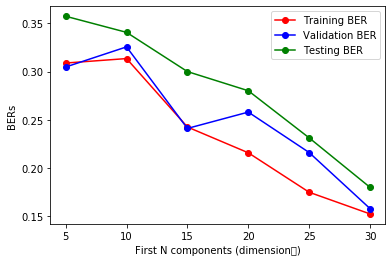

In [258]:
plt.plot(Ns, trainBERs, 'o-', color='r', label = 'Training BER')
plt.plot(Ns, validBERs, 'o-', color='b', label = 'Validation BER')
plt.plot(Ns, testBERs, 'o-', color='g', label = 'Testing BER')

plt.legend()
plt.ylabel('BERs')
plt.xlabel('First N components (dimensionㄋ)')
plt.show()

In [259]:
for i in range(len(Ns)):
    print("N=%d, training BER:%f, validation BER:%f, testing BER:%f" % (Ns[i],trainBERs[i], validBERs[i], testBERs[i]))

N=5, training BER:0.308895, validation BER:0.304786, testing BER:0.357350
N=10, training BER:0.313519, validation BER:0.325618, testing BER:0.340666
N=15, training BER:0.242663, validation BER:0.241187, testing BER:0.300051
N=20, training BER:0.215971, validation BER:0.258101, testing BER:0.280213
N=25, training BER:0.175104, validation BER:0.216224, testing BER:0.231412
N=30, training BER:0.152665, validation BER:0.158180, testing BER:0.180196
